In [1]:
from tg.common.outfittery.delivery import SagemakerLogs
from datetime import datetime

SagemakerLogs.BUCKET = 'ps-data-science-sandbox'
SagemakerLogs.PROJECT_NAME = 'tsa'

In [2]:
SagemakerLogs.find_job_ids(datetime(2022,5,22))

['TSA-PCL1-PCLS05-PNS20-2022-05-22-17-37-45-254',
 'TSA-PCL3-PCLS05-PNS20-2022-05-22-15-33-16-744',
 'TSA-PCL2-PCLS05-PNS20-2022-05-22-15-32-57-955',
 'TSA-PCL1-PCLS05-PNS20-2022-05-22-15-32-39-760',
 'TSA-PCL20-BS20K-PCLS05-PNS20-2022-05-22-12-36-50-222',
 'TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-12-36-00-494',
 'TSA-PCL20-BS20K-PCLS05-PNS50-2022-05-22-09-19-46-170',
 'TSA-PCL20-BS20K-PCLS05-PNS20-2022-05-22-09-19-24-848',
 'TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-09-19-05-230',
 'TSA-PCL20-BS20K-PCLS05-PNS5-2022-05-22-09-18-43-358']

# Initial runs

In this research, the features of the word in question, as well as surrounding words, are taken into account. All `m` features for `n` words are placed one-by-one in 2-dim tensor with `m*n` columns (and `k` rows for batches)

## Datasets and batch sizes

On `big` dataset (50x100000 sentences: 100K was OK, 50% memory used. Watch out for `debug` option in `ContextExtractor`, as it saves intermediate data and they are too huge.

On `full` dataset, only 20K is successfull with 80% memory load. We need either a bigger machine, or split dataset in parts and process them independently (which is possible and compatible with mini-batch approach anyway)

## Learning rate (-LR)

metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-LR03-2022-05-21-15-13-47-605,30.0,0.023842,0.989454,0.988781
TSA-LR01-2022-05-21-15-14-04-476,32.0,0.028012,0.988704,0.988613
TSA-LR1-2022-05-21-15-09-29-839,31.0,0.020437,0.989163,0.987269
TSA-LR003-2022-05-21-15-14-18-466,30.0,0.033622,0.986735,0.986827
TSA-LR001-2022-05-21-15-14-32-794,30.0,0.039181,0.984601,0.984837


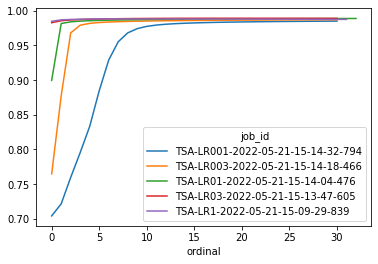

In [3]:
job_ids = ['TSA-LR001-2022-05-21-15-14-32-794',
 'TSA-LR003-2022-05-21-15-14-18-466',
 'TSA-LR01-2022-05-21-15-14-04-476',
 'TSA-LR03-2022-05-21-15-13-47-605',
 'TSA-LR1-2022-05-21-15-09-29-839'
]

sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()

sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

The results are pretty fantastic, it's actually a bit weird. Just 15 iterations are enough to get there.

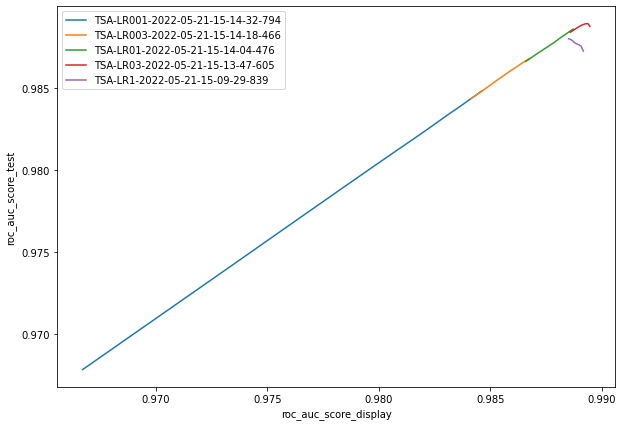

In [4]:
sl.draw_overfit('roc_auc_score_display','roc_auc_score_test', skip=8)

LR 0.3 and 1 shows signs of overfitting. Others are fine, we'll take 0.1

## Network size (-PNS)

metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-PNS10-2022-05-21-17-29-49-897,14.0,0.032691,0.988095,0.987835
TSA-PNS20-2022-05-21-17-30-05-651,14.0,0.032951,0.987711,0.987516
TSA-PNS5-2022-05-21-17-29-35-478,14.0,0.032769,0.987014,0.986927


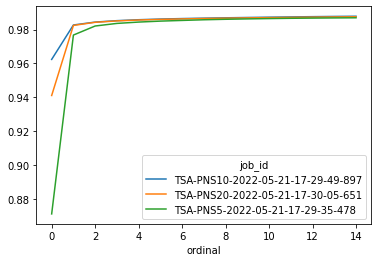

In [5]:
job_ids = ['TSA-PNS20-2022-05-21-17-30-05-651',
 'TSA-PNS10-2022-05-21-17-29-49-897',
 'TSA-PNS5-2022-05-21-17-29-35-478'
          ]

sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()
sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

Bigger than 10 network sizes do not really produce more quality. But 50 is still used in the following networks just in case, as more features will be used

## Context length (-PCL)

metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-PCL15-BS20K-2022-05-21-21-44-12-997,14.0,0.031896,0.987646,0.987408
TSA-PCL10-2022-05-21-19-31-29-388,14.0,0.033076,0.987259,0.987226
TSA-PCL7-2022-05-21-20-58-29-303,14.0,0.034336,0.986934,0.987057
TSA-PCL20-BS20K-2022-05-21-19-48-49-148,14.0,0.031660,0.987438,0.987015
TSA-PCL5-2022-05-21-19-31-14-797,14.0,0.035759,0.986409,0.986703
TSA-PCL3-2022-05-21-19-31-00-478,14.0,0.040682,0.983996,0.984323
TSA-PCL2-2022-05-21-20-57-18-328,14.0,0.046544,0.980674,0.980932
TSA-PCL1-2022-05-21-20-57-02-570,14.0,0.085772,0.950574,0.951895


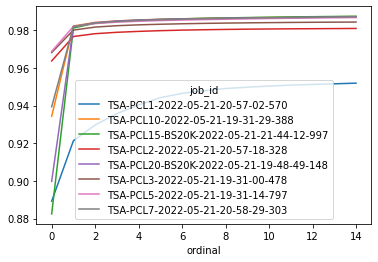

In [6]:
job_ids = [
 'TSA-PCL20-BS20K-2022-05-21-19-48-49-148',
 'TSA-PCL10-2022-05-21-19-31-29-388',
 'TSA-PCL5-2022-05-21-19-31-14-797',
 'TSA-PCL3-2022-05-21-19-31-00-478',
 'TSA-PCL15-BS20K-2022-05-21-21-44-12-997',
 'TSA-PCL7-2022-05-21-20-58-29-303',
 'TSA-PCL2-2022-05-21-20-57-18-328',
 'TSA-PCL1-2022-05-21-20-57-02-570',
          ]

sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()
sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

This is strange. Although the context affects the quality in a predictable way (the more context - the better), the quality of 95 on the PCLS 1, which is essentially only the word in question, is dubious.

## Context position (-PCLS)

Legend: 0 - only left context, 1 - only right context, 0.5 left and right even

metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-PCL20-BS20K-PCLS05-2022-05-21-21-44-50-982,14.0,0.026169,0.991318,0.990880
TSA-PCLS05-2022-05-21-19-29-14-423,14.0,0.028446,0.990680,0.990703
TSA-PCLS075-2022-05-21-19-29-28-630,14.0,0.028554,0.990173,0.990291
TSA-PCLS025-2022-05-21-19-29-00-107,14.0,0.032613,0.989263,0.989098
TSA-PCLS0-2022-05-21-19-28-45-267,14.0,0.032760,0.987348,0.987333
TSA-PCLS1-2022-05-21-19-29-43-300,14.0,0.077508,0.955309,0.955370


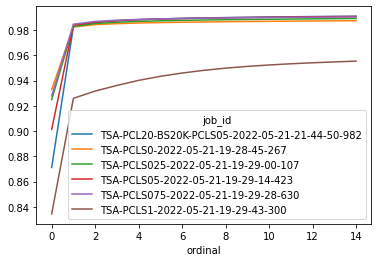

In [7]:
job_ids = ['TSA-PCLS1-2022-05-21-19-29-43-300',
 'TSA-PCLS075-2022-05-21-19-29-28-630',
 'TSA-PCLS05-2022-05-21-19-29-14-423',
 'TSA-PCLS025-2022-05-21-19-29-00-107',
 'TSA-PCLS0-2022-05-21-19-28-45-267',
 'TSA-PCL20-BS20K-PCLS05-2022-05-21-21-44-50-982',
]


sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()
sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

Again, these results make sense: the right context is thought to be much less predictive. 20 with PCLS 0.5 is probably OK, because it gives 10 words from the left (which is still enough to make an accurate prediction from the left), which also offering some context from the right, which has some value.

## Network size again



metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-09-19-05-230,14.0,0.025383,0.991633,0.991367
TSA-PCL20-BS20K-PCLS05-PNS20-2022-05-22-09-19-24-848,14.0,0.025784,0.991635,0.991177
TSA-PCL20-BS20K-PCLS05-PNS50-2022-05-22-09-19-46-170,14.0,0.025994,0.991425,0.991090
TSA-PCL20-BS20K-PCLS05-PNS5-2022-05-22-09-18-43-358,14.0,0.026744,0.990820,0.990179


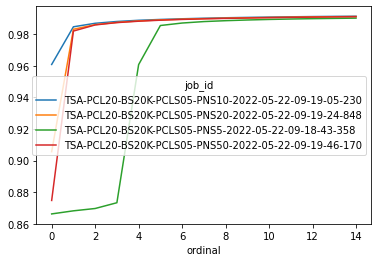

In [8]:
job_ids = ['TSA-PCL20-BS20K-PCLS05-PNS50-2022-05-22-09-19-46-170',
 'TSA-PCL20-BS20K-PCLS05-PNS20-2022-05-22-09-19-24-848',
 'TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-09-19-05-230',
 'TSA-PCL20-BS20K-PCLS05-PNS5-2022-05-22-09-18-43-358']

sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()
sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

Again, small networks are fine. Size of 10/20 will be used in the following experiments

# Figuring out the unexpectedly high quality

0.99 ROC AUC is essentially solved task. It looks strange that this task is solved by the first attempt with such a quality.

There were some methodological deficincies when building the dataset:
* the methodolody is to take a correct sentence, keep it as a positive sample, and also replace a verb with incorrect form to create a negative sample. These positive and negative samples may end up in different splits, and it might be the cause for the data leak
* only newspapers were included in the experiments, books weren't

After correcting these:

metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-12-36-00-494,14.0,0.028538,0.990547,0.989526
TSA-PCL20-BS20K-PCLS05-PNS20-2022-05-22-12-36-50-222,14.0,0.029172,0.990295,0.989226


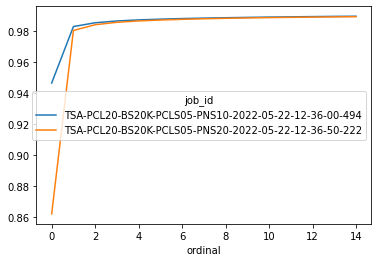

In [9]:
job_ids = [
    'TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-12-36-00-494',
    'TSA-PCL20-BS20K-PCLS05-PNS20-2022-05-22-12-36-50-222'
]

sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()
sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

The quality is still very high. Repeating the experiment with small contexts:

metric,iteration,loss,roc_auc_score_display,roc_auc_score_test
job_id,,,,
TSA-PCL3-PCLS05-PNS20-2022-05-22-15-33-16-744,14.0,0.046219,0.981952,0.981318
TSA-PCL2-PCLS05-PNS20-2022-05-22-15-32-57-955,14.0,0.051283,0.978820,0.978428
TSA-PCL1-PCLS05-PNS20-2022-05-22-15-32-39-760,14.0,0.092709,0.939720,0.940296


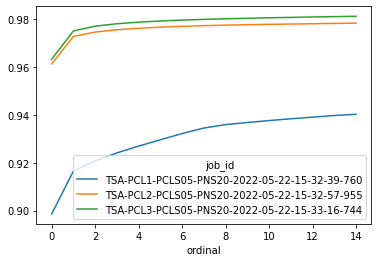

In [10]:
job_ids = ['TSA-PCL3-PCLS05-PNS20-2022-05-22-15-33-16-744',
 'TSA-PCL2-PCLS05-PNS20-2022-05-22-15-32-57-955',
 'TSA-PCL1-PCLS05-PNS20-2022-05-22-15-32-39-760',
 ]

sl = SagemakerLogs(job_ids).load_from_s3()
sl.get_metric_by_job('roc_auc_score_test').plot()
sl.get_last_values().sort_values('roc_auc_score_test',ascending=False)

This high performance for context length 1 is still high and puzzling. 

## Reproducing the dataset locally

Checking if there is an obvious data leak:

In [11]:
from tg.common.delivery.training import download_and_open_sagemaker_result
from tg.common import DataBundle, Loc

result = download_and_open_sagemaker_result(SagemakerLogs.BUCKET, SagemakerLogs.PROJECT_NAME, 'TSA-PCL1-PCLS05-PNS20-2022-05-22-15-32-39-760', dont_redownload=True)
task = result.unpickle('output/training_task.pkl')
task.settings.continue_training = True
db = DataBundle.load(Loc.data_cache_path/'bundles/tsatsa/bundles/small')


In [12]:
task.settings.batch_size=1000
task.batcher.batch_size=1000
task.batcher.extractors[0].debug=True
batch = task.generate_sample_batch(db)

In [13]:
list(task.batcher.extractors[0].data_.feature_dfs['f0'])

['pymorphy_score',
 'pymorphy_delta_score',
 'pymorphy_alternatives',
 'pymorphy_POS_INFN',
 'pymorphy_POS_VERB',
 'pymorphy_POS_CONJ',
 'pymorphy_animacy_NULL',
 'pymorphy_gender_NULL',
 'pymorphy_number_sing',
 'pymorphy_number_plur',
 'pymorphy_number_NULL',
 'pymorphy_case_NULL',
 'pymorphy_aspect_impf',
 'pymorphy_aspect_perf',
 'pymorphy_aspect_NULL',
 'pymorphy_transitivity_intr',
 'pymorphy_transitivity_NULL',
 'pymorphy_person_3per',
 'pymorphy_person_NULL',
 'pymorphy_tense_pres',
 'pymorphy_tense_futr',
 'pymorphy_tense_NULL',
 'pymorphy_mood_indc',
 'pymorphy_mood_NULL',
 'pymorphy_voice_NULL',
 'pymorphy_involvement_NULL',
 'slovnet_POS_VERB',
 'slovnet_POS_NOUN',
 'slovnet_POS_ADV',
 'slovnet_POS_ADJ',
 'slovnet_POS_PROPN',
 'slovnet_POS_PUNCT',
 'slovnet_POS_PRON',
 'slovnet_POS_SCONJ',
 'slovnet_POS_ADP',
 'slovnet_POS_AUX',
 'slovnet_POS_NUM',
 'slovnet_POS_X',
 'slovnet_Animacy_Inan',
 'slovnet_Animacy_Anim',
 'slovnet_Animacy_NULL',
 'slovnet_Case_Nom',
 'slovnet_Cas

There is no visible sings of data leak. However, `syntax_fixes_links_to` is pretty telling: if `slovnet` attaches many words to the verb-in-question, then probably it assumes it to be in finite form (and the root of clause).

So probably the syntax features of `slovnet` is the reason why network performs so well. To check this I will:

* detach slovnet morph features from slovnet syntax features.
* add additional frame of syntax statistics with the fields like subtree_size, depth, children_count etc.
* run the experiment with different sets of features and assess their contribution.


## Exploring the model's errors

The following code shows the cases where the model errs

<AxesSubplot:>

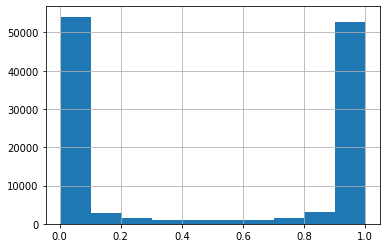

In [14]:
import pandas as pd
rdf = sl.load_files_for_jobs('output/result_df.parquet',pd.read_parquet,['TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-12-36-00-494']).first().value
rdf.predicted.hist()

Optimal roc_auc borderline, computed on `display` dataset

In [15]:
import numpy as np
from tg.common.ml.misc import roc_optimal_threshold
opt = roc_optimal_threshold(rdf.loc[rdf.stage=='display'].true, rdf.loc[rdf.stage=='display'].predicted)
rdf['predicted_label'] = np.where(rdf.predicted>opt,1,0)
opt

0.3869551122188568

In [16]:
rdf['miss'] = rdf.predicted_label!=rdf.true
rdf.loc[rdf.miss]

,word_id,sentence_id,label,reference_sentence_id,split,true,predicted,stage,predicted_label,miss
sample_id,,,,,,,,,,
286,2011539,2005103,0,44002,test,0,0.526623,test,1,True
358,2013254,2012484,1,43754,test,1,0.142453,test,0,True
410,2014500,2012536,1,43806,test,1,0.151060,test,0,True
610,2019168,2012732,1,44002,test,1,0.145840,test,0,True
669,2020563,2020101,0,44062,test,0,0.667595,test,1,True
...,...,...,...,...,...,...,...,...,...,...
233951,5447371,5442622,1,118325,display,1,0.061329,display,0,True
233979,5447995,5442650,1,118353,display,1,0.281919,display,0,True
234257,5454346,5450858,0,118626,display,0,0.510010,display,1,True


In [17]:
src = pd.read_parquet(Loc.data_cache_path/'bundles/tsatsa/bundles/big/src.parquet')

In [18]:
from tg.grammar_ru.common import DfViewer

DfViewer().convert(src.loc[src.sentence_id==2012732])

In [19]:
sdf = rdf.merge(
    src.groupby('sentence_id').size().to_frame('sentence_length'),
    left_on='sentence_id',
    right_index=True
)

<AxesSubplot:xlabel='sentence_length'>

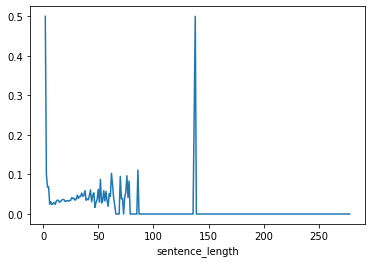

In [20]:
sdf.groupby('sentence_length').miss.mean().plot()

In [21]:
sdf.loc[sdf.miss & (sdf.sentence_length<5)]

,word_id,sentence_id,label,reference_sentence_id,split,true,predicted,stage,predicted_label,miss,sentence_length
sample_id,,,,,,,,,,,
32851,18312572,18312551,0,403839,test,0,0.960192,test,1,True,4
32868,18312851,18312830,1,403839,test,1,0.111324,test,0,True,4
36560,18380629,18380304,0,405687,test,0,0.482699,test,1,True,2
37192,18389750,18389615,1,405998,test,1,0.245058,test,0,True,3
38001,18402201,18402025,1,406420,test,1,0.062404,test,0,True,4
81015,8622142,8615201,1,187110,test,1,0.023938,test,0,True,3
108452,17792528,17791902,0,388739,test,0,0.972145,test,1,True,3
108503,17793494,17792868,1,388739,test,1,0.376893,test,0,True,3
108945,17801897,17801712,0,388971,test,0,0.495825,test,1,True,3


In [22]:
DfViewer().convert(src.loc[src.sentence_id==17801297])

Very short sentences seem to be just short repetitions of previous sentences. It is indeed impossible to predict the correct form in this case. Very long sentences have correcpondingly complicated grammar and the errors there are also expected.

## Code to run network for a new text

In [23]:
from tg.grammar_ru.common import Separator
from tg.grammar_ru.ml.corpus import fast_bundle
from tg.grammar_ru.ml.features import PyMorphyFeaturizer, SlovnetFeaturizer, SyntaxEnricher
from yo_fluq_ds import *
from tg.common import Loc
from tg.common.delivery.training import download_and_open_sagemaker_result

result = download_and_open_sagemaker_result(SagemakerLogs.BUCKET, SagemakerLogs.PROJECT_NAME, 'TSA-PCL20-BS20K-PCLS05-PNS10-2022-05-22-12-36-00-494', dont_redownload=True)
task = result.unpickle('output/training_task.pkl')

In [24]:
s = '''
Предыдущие части, Время и Ничто и Время и Тьма, по сути, отвечали на вопрос «кто виноват в становлении эпохи антинаучной фантастики». Виновата, как видно, сама человеческая природа: откат к религиозному мышлению — это естественная реакция несовершенного человеческого вычислителя на научный прогресс в тот момент, когда он достигает Витгейнштейновского разрыва. Начиная с этого текста, мы перейдем к другому животрепещущему вопросу: «что делать?». Есть ли какой-то шанс избавится от антинаучной фантастики, обернуть вспять разложение и восстановить разум в этом мире?

Как мне кажется, предпосылки для смены парадигмы есть, и их много.

Во-первых, как я говорил в прошлом тексте, общественные процессы ускоряются, и они ускорялись всегда: период науки гораздо короче, чем период античности, средневековье гораздо короче мифа. Возможно, происходит это за счет языкового развития: становящееся все более точным описание реальности сокращает восходящую эпоху за счет улучшающихся средств вывода и коммуникации, а нисходящую эпоху — за счет затруднения создания фантазмов. Возможно, за счет увеличивающегося «плеча» технологий и тех, кто ими пользуется. Так или иначе, но ускорение — это один из основных причин ожидания сингулярности: количество что накопленной информации, что процессорных мощностей идет по экспоненте, которая совсем скоро станет неотличимой от вертикали.

Поэтому я совершенно не ожидаю, что эпоха антинаучной фантастики продлится столько же, сколько средневековье, десять веков — нет, это закончиться гораздо раньше.

Во-вторых, это признаки начавшегося столкновения с реальностью. В аудиозаписи, которая была закончена до украинской войны, в этом месте шел пассаж о том, что разрушения от беженцев, коронавируса и озеленения пока нельзя сравнивать с мировыми войнами — and here we are… Как я и говорил, все ускоряется, прошло всего-то два месяца с момента, как я сделал аудиозапись, а мир уже радикально изменился. И ведь эти разрушения ложатся на гораздо более нежное, привыкшее к комфорту общество. Закон Годвина официально отменен самим Годвином, Путина сравнивают с Гитлером все, кому не лень — хотя масштабы, безусловно, разные. Западное общество (как, в общем-то, и российское) десятилетиями находилось на совершенно невероятном, немыслимом на протяжении всей истории уровне комфорта, который сейчас резко упал — и это будет эмоционально и экзистенциально ощутимое падение, несмотря на то, что до физических условий ГУЛАГа может и не дойти.'''
word_list = FileIO.read_json(Loc.root_path/'scripts/tsatsa-dict.json')
df = Separator.separate_string(s)


def analyze(df, task):
    index = df[['word','word_id', 'sentence_id']]
    index = index.loc[index.word.str.lower().isin(word_list)]
    if index.shape[0]==0:
        return None
    index.index.name = 'sample_id'
    index['label'] = 0
    db = fast_bundle(df, PyMorphyFeaturizer(), SlovnetFeaturizer(), SyntaxEnricher())
    db['index'] = index
    return task.predict(db.index.index, db, None)
    
analyze(Separator.separate_string(s), task)

,word,word_id,sentence_id,label,true,predicted,stage
sample_id,,,,,,,
82,избавится,82,3,0,0,0.544541,test
240,продлится,240,9,0,0,0.026175,test
253,закончиться,253,9,0,0,0.992474,test


I have run the network on some paragraphs of my own longread. It correctly catches two errors!